<a href="https://colab.research.google.com/github/xBrymer/TensorFlow-Basics/blob/master/Conv2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# This program uses Convolutional Neural Netwrok (CNN):
#       to classify handwritten digits as numbers 0-9

In [3]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

In [4]:
# load the data and split in into train and test sets

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
train_images, test_images = train_images/255, test_images/255

In [6]:
train_images = train_images.reshape(60000, 28,28,1)
test_images = test_images.reshape(10000, 28,28, 1)

In [7]:
# ONE-HOT ENCODING
# - converts category to numbers

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)



In [8]:
print(train_labels_one_hot[0])


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [21]:
#Build the CNN Model

model = Sequential([
    Conv2D(64, kernel_size=3, activation = 'relu', input_shape = (28,28,1)),
    Conv2D(32, kernel_size=3, activation = 'relu'),
    Flatten(),
    Dense(10, activation = 'softmax')
])


ValueError: ignored

In [10]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [12]:
# Train the model

hist = model.fit(
    train_images, train_labels_one_hot, epochs = 5, validation_data = (test_images, test_labels_one_hot)
)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0931 - accuracy: 0.9727 - val_loss: 0.0496 - val_accuracy: 0.9841
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0470 - accuracy: 0.9849 - val_loss: 0.0522 - val_accuracy: 0.9822
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0306 - accuracy: 0.9904 - val_loss: 0.0390 - val_accuracy: 0.9875
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0204 - accuracy: 0.9934 - val_loss: 0.0424 - val_accuracy: 0.9886
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0128 - accuracy: 0.9961 - val_loss: 0.0539 - val_accuracy: 0.9865


<function matplotlib.pyplot.show>

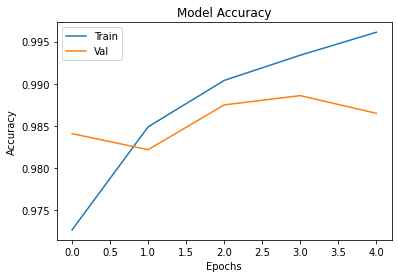

In [22]:
#Visualize the models accuracy

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show

In [25]:
model.save('CONV2D.h5')